In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from numpy.linalg import svd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



(1600, 1200)


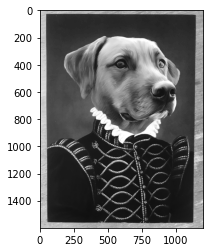

In [7]:
# importing matplotlib modules
from matplotlib.image import imread
import matplotlib.pyplot as plt
  
# Read Images
image_path = 'images/bellie.jpg'
img = imread(image_path)
  
# Output Images
plt.imshow(img)
X = np.asarray(img).mean(axis=2)
print(X.shape)
plt.imshow(X, cmap='gray')

 # Find best rank r approximation to original image
 
$- X =USV^T=\sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + ... + \sigma_{\min(m,n)} u_{\min(m,n)} v_{\min(m,n)}^T$

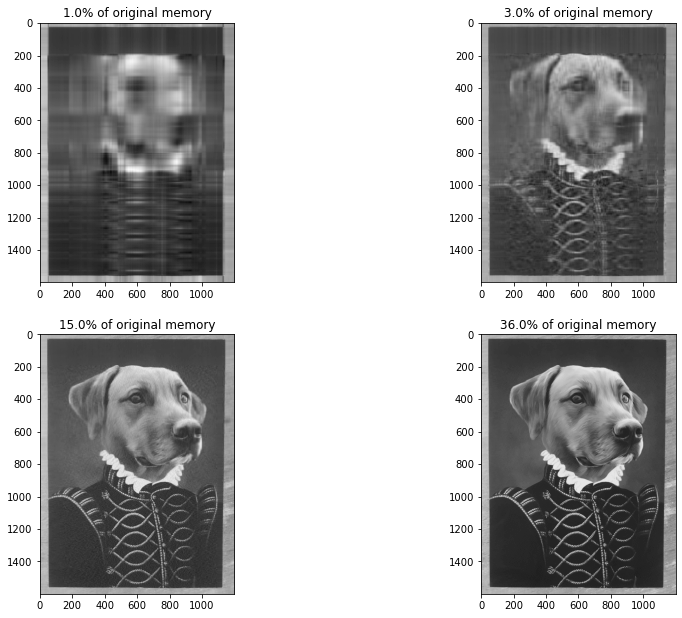

In [5]:
img = plt.imread(image_path)
X = np.asarray(img).mean(axis=2)

fig, ax = plt.subplots(2,2)
fig.set_size_inches(14.5, 10.5)

# Do economy svd; leave out right nullspace
U, S, V = svd(X, full_matrices=False)

for i, rank in enumerate([5, 20, 100, 250]):
    
    # First few columns from basis column space
    U_r = U[:, :rank]
    size_U_r = np.prod(U_r.shape)
    
    # Subblock of singular values
    S_r = np.diag(S)[:rank, :rank]
    
    # First few rows from basis row space
    V_r = V[:rank, :]
    size_V_r = np.prod(V_r.shape)
    
    # Total size reduced 
    X_r_size = size_U_r + size_V_r
    X_size = np.prod(X.shape)
    
    # Reconstruct X
    X_r = U_r @ S_r @ V_r
    
    ax[i//2, i%2].imshow(X_r, cmap='gray')
    ax[i//2, i%2].set_title("{}% of original memory".format(np.round(X_r_size/X_size,2)*100))
    